In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
import pandas as pd
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1YgjesgjYJh315Kj823ddOlSBEr1bf3AMfDaN3c34_PU/edit?usp=sharing')
sheet = wb.worksheet('Sheet1')
data = sheet.get_all_values()

df = pd.DataFrame(data[1:])
df.columns = data[0]

In [ ]:
import numpy as np
df[df=='']=np.nan
df = df.drop('Red', axis=1)
df.dropna(axis=0)
df.to_csv('ColorDeterminationSurveyData.csv',index=None)

#### Read cleaned data back into a pandas dataframe

In [ ]:
colordata=pd.read_csv('ColorDeterminationSurveyData.csv')
colordata

,Green,Blue,Purple,Date
0,215,84,1,7/14/2020 15:26:36
1,82,218,0,7/14/2020 15:35:19
2,253,206,0,7/14/2020 15:44:37
3,22,86,0,7/14/2020 15:44:55
4,32,35,0,7/14/2020 15:45:15
...,...,...,...,...
409,143,18,0,7/14/2020 15:45:50
410,198,255,0,7/14/2020 15:46:29
411,204,122,0,7/14/2020 15:46:53
412,35,66,0,7/14/2020 15:54:45


#### Sklearn Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x=colordata[['Green','Blue']]
y=colordata['Purple']

model = LogisticRegression()
model.fit(x,y)

y_pred = model.predict([[200,100]])[0]
y_pred

0

In [ ]:
y_pred=model.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
confusionmatrix = confusion_matrix (y, y_pred)
confusionmatrix

array([[288,  11],
       [110,   5]])

#### Try nonlinear classification (KNN)

#### Create a new data point to test

In [ ]:
import csv
import numpy as np
colorScores = []
with open('ColorDeterminationSurveyData.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        colorScores.append(row)
f.close()

colorScores = colorScores[1:]

processedScores=[]
for j in range(len(colorScores)):
    processedScores.append([])
    for i in range(len(colorScores[j])-1):
        processedScores[j].append(int(colorScores[j][i]))
finalScores = []
for row in processedScores:
    finalScores.append(np.asarray(row))
    
# red = int(input('enter the red value: '))
green = int(input('enter the green value: '))
blue = int(input('enter the blue value: '))

    
# inputColor = np.asarray([red,green,blue])
inputColor = np.asarray([green,blue])


enter the green value: 200
enter the blue value: 100


#### Compare to historical data and establish similarity metric (this is the KNN)

In [ ]:
k=4

distList = []
for i in range(len(finalScores)):
    dist = np.linalg.norm(inputColor-finalScores[i][0:2])
    distList.append(dist)

nearestNeighborsList = []
for j in range(k):
    nearestNeighborsList.append(distList.index(min(distList)))
    distList.remove(min(distList))
    
total = 0
for l in range(k):
    total = total + finalScores[nearestNeighborsList[l]][2]

average = total/k

print(average)

if average < 0.5:
    print("probably not purple")
else:
    print("probably purple")

0.25
probably not purple


#### Verify

In [ ]:
from colorsys import hsv_to_rgb
from PIL import Image

# # Make some RGB values. 
# # Cycle through hue vertically & saturation horizontally
# colors = []
# for hue in range(360):
#     for sat in range(100):
#         # Convert color from HSV to RGB
#         rgb = hsv_to_rgb(hue/360, sat/100, 1)
#         rgb = [int(0.5 + 255*u) for u in rgb]
#         colors.extend(rgb)


# # Convert list to bytes
# colors = bytes(colors)
# img = Image.frombytes('RGB', (100, 360), colors)


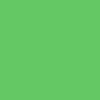

In [ ]:
colors = []
for hue in range(100):
    for sat in range(100):
        # Convert color from HSV to RGB
        # rgb = hsv_to_rgb(hue/360, sat/100, 1)
        rgb = [100, inputColor[0], inputColor[1]]
        colors.extend(rgb)

im = Image.frombytes("RGB", (100, 100), bytes(colors))
im